## Importing libraries

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import  yfinance  as yf
import  pandas  as pd
from scipy.optimize import minimize 
from scipy import stats

%matplotlib inline


In [4]:
plt.scatter?

## stocks list we will be including in our portfolio

The content of the list below are  tickers of each stocks or security to be used in our portfolio as you might have noticed most of the tickers are technology related stocks.

In [5]:
stocks_dict = {
    'NVDA':'Nvidia',
    'PSX':'ConocoPhillips',
    'BBY':'Best Buy',
    'LRCX':'Lam Research',
    'IDXX':'Idexx Laboratories',
    'POOL':'Pool',
    'JBHT':'J.B. Hunt Transport Service',
    'VRSK':'Verisk Analytics',
    'SCL':'Stepan',
    'FSLR':'First Solar',
    'MA':'MasterCard'
}

In [6]:
stocks = list(stocks_dict.keys())
stocks


['NVDA',
 'PSX',
 'BBY',
 'LRCX',
 'IDXX',
 'POOL',
 'JBHT',
 'VRSK',
 'SCL',
 'FSLR',
 'MA']


## Fetching stocks data from yahoo finance


 We are downloading daily historical prices of the stocks we intend to use in our portfolio from yahoo finance,we are getting stocks data from 1st of January 2019 to 25th of June 2022, that is almost a 4 year and half stocks data. 
 
For a stock we usually have the OHLCVA standing for Open, High, Low, Close, Volume and Adjusted Close data of the stocks but here we are only interested in the Adjusted Close, A reason why we have seperated it only. Some analyst do however use these other candle data to for different analysis for example, traders use some of them to build their trading strategy indicators.



In [7]:

stocksprcs = yf.download(stocks, 
                         interval = '1d',
                      start='2019-01-01', 
                      end='2023-06-25', 
                      progress=False,
)
stocksprcs    =    stocksprcs['Adj Close'] 

stocksprcs 



,BBY,FSLR,IDXX,JBHT,LRCX,MA,NVDA,POOL,PSX,SCL,VRSK
Date,,,,,,,,,,,
2019-01-02,46.224857,42.560001,182.460007,89.411133,129.315796,184.815689,33.796223,139.311813,71.800446,70.291237,105.464287
2019-01-03,45.276218,43.439999,178.020004,87.157646,123.079071,176.477844,31.754362,137.850861,70.806396,69.009941,102.241638
2019-01-04,45.491821,46.320000,187.429993,89.526222,129.091370,184.835129,33.788792,142.539154,74.016701,71.657959,106.755302
2019-01-07,48.087662,45.790001,186.889999,89.411133,130.241440,186.257278,35.577602,143.369843,74.530045,72.654526,106.862061
2019-01-08,49.501999,46.230000,189.289993,91.942741,128.034775,187.613556,34.691872,143.064316,74.464882,73.537193,107.813347
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16,79.790001,188.990005,483.029999,176.317825,612.650024,375.986267,426.920013,356.930664,96.229614,96.699997,224.520004
2023-06-20,78.820000,186.100006,482.220001,173.583450,614.280029,374.079041,438.079987,352.503296,92.613457,94.110001,225.970001
2023-06-21,79.019997,184.580002,485.820007,175.998489,605.799988,375.596863,430.450012,355.724091,92.415306,93.550003,227.220001


So we have a dataframe of 1127 observations i.e 1127 days of stocks data for 11 stocks.

## Data Cleaning

#### Checking for null values in the dataframe
*This checks for the presence of any null value in the dataframe*

In [8]:

stocksprcs.isnull().values.any()


False

## Plotting the stocks prices

In [9]:
 
def get_freqs(data, freq): 
    
    freqs =[]
    for i in range(len(data)) :
        if i%freq==0 or i == len(data)-1 :
            freqs.append(data[i]) 
    return  freqs   


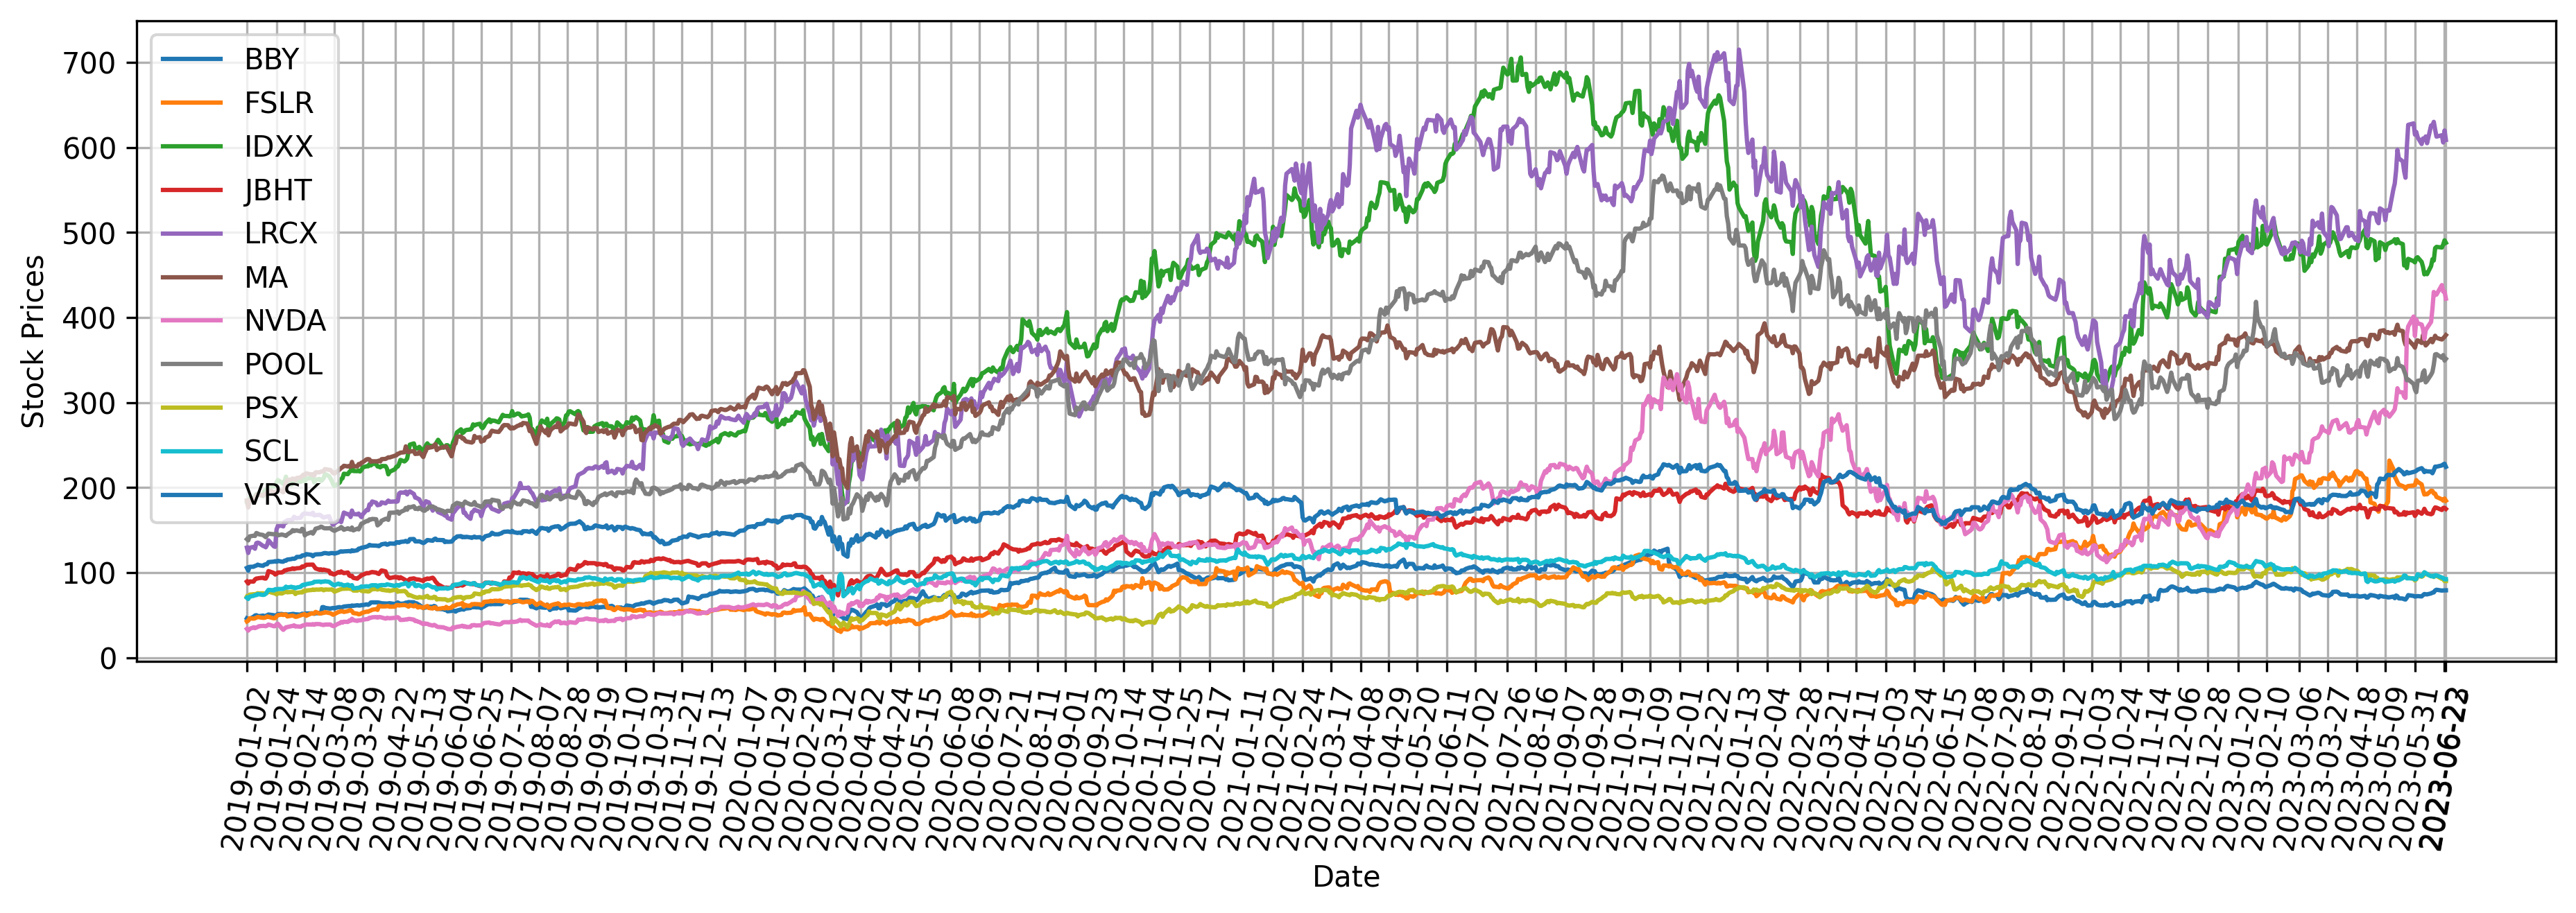

In [10]:

plt.figure(figsize = (15,4), dpi = 300)

plt.plot( stocksprcs.index,  stocksprcs, label =  stocksprcs.columns  )                   
plt.xticks(rotation =80)
plt.xticks( get_freqs(stocksprcs.index, 15))   
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.grid() 
plt.legend()   
plt.show()       
    




### Returns of stocks (Logarithmic)



The mathematical formula below represents how to get logarithmic returns, note that the first observation will not be available therefore it will be null, so we have to drop it.



## $$R_{t} = log(\frac{P_{t}}{P_{t-1}}) = log(P_{t}) - log(P_{t-1}) $$


In [11]:

stocks_rets = np.log(stocksprcs/stocksprcs.shift()).dropna()  
stocks_rets


,BBY,FSLR,IDXX,JBHT,LRCX,MA,NVDA,POOL,PSX,SCL,VRSK
Date,,,,,,,,,,,
2019-01-03,-0.020736,0.020466,-0.024635,-0.025527,-0.049430,-0.046164,-0.062319,-0.010542,-0.013941,-0.018397,-0.031033
2019-01-04,0.004751,0.064193,0.051509,0.026813,0.047693,0.046269,0.062099,0.033444,0.044341,0.037654,0.043200
2019-01-07,0.055493,-0.011508,-0.002885,-0.001286,0.008870,0.007665,0.051587,0.005811,0.006912,0.013811,0.001000
2019-01-08,0.028987,0.009563,0.012760,0.027921,-0.017088,0.007255,-0.025211,-0.002133,-0.000875,0.012076,0.008863
2019-01-09,0.007463,0.015667,0.015360,0.011304,0.050344,0.017988,0.019476,0.023874,0.006543,-0.000645,0.003774
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16,0.010203,-0.020374,0.003339,-0.001414,-0.013537,-0.006644,0.000914,0.001230,0.001133,-0.001860,-0.000223
2023-06-20,-0.012231,-0.015410,-0.001678,-0.015630,0.002657,-0.005086,0.025805,-0.012482,-0.038303,-0.027149,0.006437
2023-06-21,0.002534,-0.008201,0.007438,0.013817,-0.013901,0.004049,-0.017570,0.009095,-0.002142,-0.005968,0.005516


##  Plotting the stocks returns

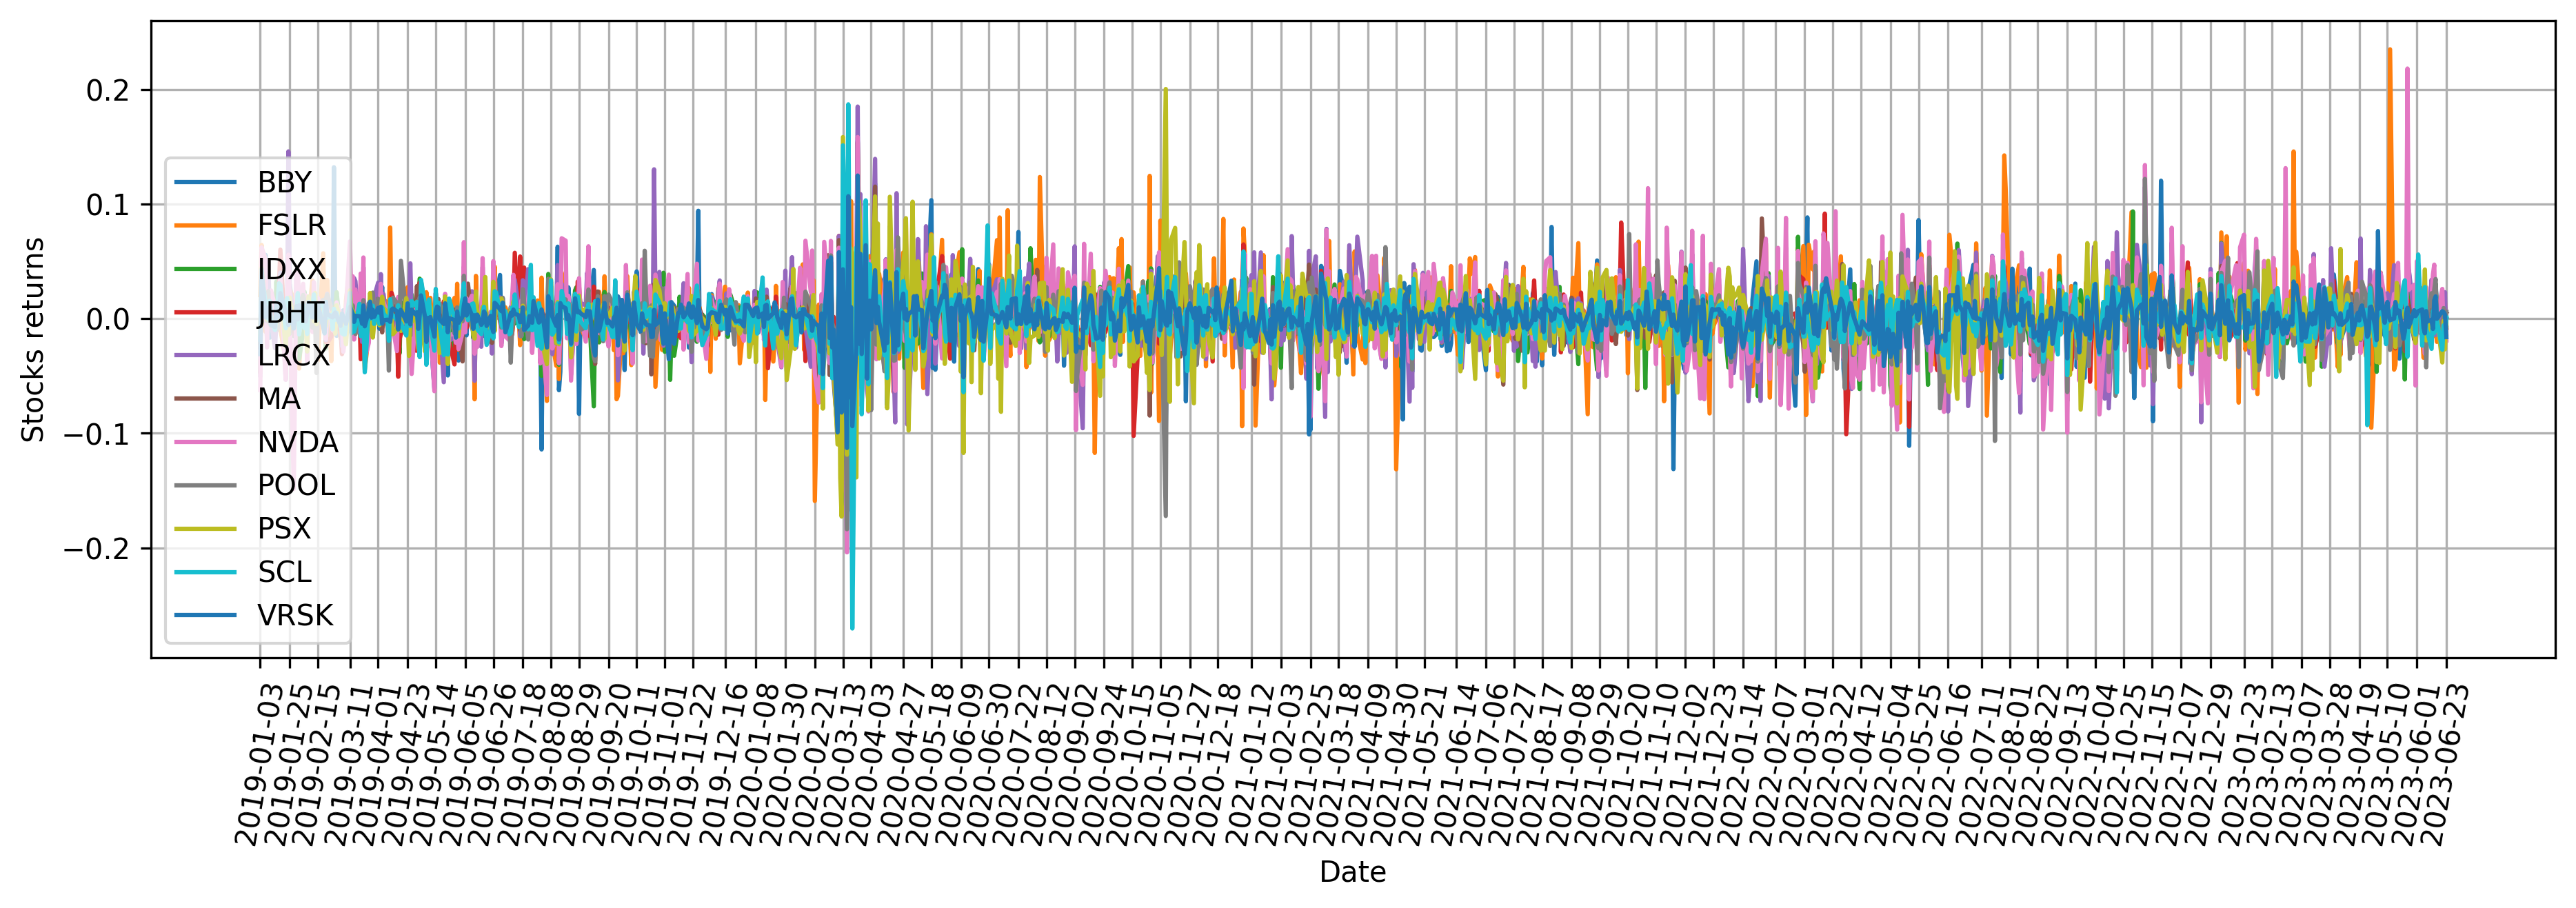

In [12]:

plt.figure(figsize = (15,4), dpi = 300)

plt.plot( stocks_rets.index,  stocks_rets, label =  stocks_rets.columns  )                   
plt.xticks(rotation =80)
plt.xticks( get_freqs(stocks_rets.index, 15))   
plt.xlabel('Date')
plt.ylabel('Stocks returns')
plt.grid() 
plt.legend()   
plt.show()       
    



### The  return vector is calculated below , then it is annualized by multiplying by 252 since we have 252 trading days in a year.


## $$ R =\
\begin{bmatrix}
R_{1} \\
R_{2} \\
\vdots \\
R_{n} 
\end{bmatrix}
$$




In [ ]:
# # $\vec R$  =  ($R_{1},R_{2},....,R_{n}$)

In [13]:
stocks_rets_mean = stocks_rets.mean() * 252
stocks_rets_mean

BBY     0.120310
FSLR    0.328281
IDXX    0.220071
JBHT    0.150062
LRCX    0.346705
MA      0.160883
NVDA    0.565068
POOL    0.207023
PSX     0.050605
SCL     0.060647
VRSK    0.168933
dtype: float64

In [ ]:

#![alternative text](images/variance_mean_constraint.jpg)


In [ ]:
# variance_mean_constraint.jpg

#  Plotting the mean returns of the stocks. 

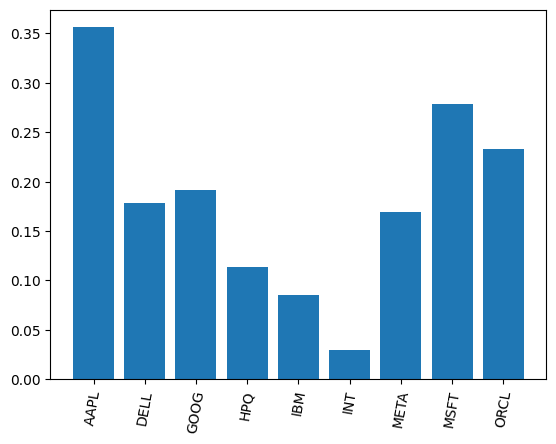

In [19]:


plt.bar(stocks_rets_mean.index,stocks_rets_mean)
plt. xticks(rotation =80)
plt.show()


## Variance -covariance matrix of stocks returns

 The variance - covariance matrix has the diagonal as the stocks varinace withe the upper and lower triangles as the variance of a stock with respect to the other, also it is worth nothing the the matrix is symmetric about the diagonal

## $$ V =\
\begin{bmatrix}
\sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,n} \\
\sigma_{2,1} & \sigma_{2}^2 & \cdots & \sigma_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n,1} & \sigma_{n,2} & \cdots & \sigma_{n}^2 
\end{bmatrix}
$$

In [17]:

# print('The variance-covariance matrix of the stocks : ') 

# plotting variance-covariance  heatmap 

stocks_rets_cov = stocks_rets.cov()*252

stocks_rets_cov



,BBY,FSLR,IDXX,JBHT,LRCX,MA,NVDA,POOL,PSX,SCL,VRSK
BBY,0.163627,0.061293,0.057991,0.056294,0.097479,0.061841,0.100934,0.069054,0.064717,0.056669,0.049049
FSLR,0.061293,0.250983,0.048661,0.044199,0.100219,0.048089,0.098967,0.045950,0.055143,0.037641,0.037188
IDXX,0.057991,0.048661,0.121167,0.043631,0.091173,0.061503,0.106834,0.071768,0.026267,0.034346,0.054846
JBHT,0.056294,0.044199,0.043631,0.102230,0.074425,0.049866,0.069611,0.055752,0.048156,0.049798,0.042503
LRCX,0.097479,0.100219,0.091173,0.074425,0.241268,0.095676,0.185268,0.077900,0.082234,0.063121,0.065661
MA,0.061841,0.048089,0.061503,0.049866,0.095676,0.108341,0.095460,0.051659,0.072692,0.050407,0.052372
NVDA,0.100934,0.098967,0.106834,0.069611,0.185268,0.095460,0.280885,0.095232,0.060914,0.057377,0.070969
POOL,0.069054,0.045950,0.071768,0.055752,0.077900,0.051659,0.095232,0.134685,0.021128,0.052434,0.054060
PSX,0.064717,0.055143,0.026267,0.048156,0.082234,0.072692,0.060914,0.021128,0.192715,0.050717,0.029999
SCL,0.056669,0.037641,0.034346,0.049798,0.063121,0.050407,0.057377,0.052434,0.050717,0.110251,0.039926


plotting the the variance-covariance matrix of the stocks: 


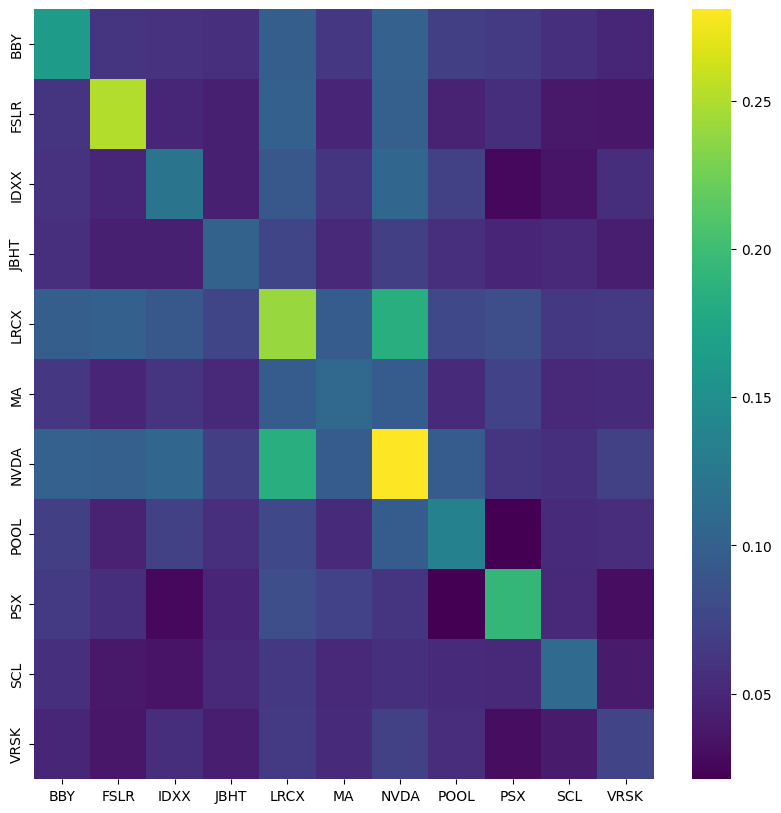

In [20]:

print('plotting the the variance-covariance matrix of the stocks: ') 


plt.figure(figsize=(10,10))#feel free to reduce the figure size if it is too big

dataplot = sns.heatmap(stocks_rets_cov, cmap="viridis", annot=False) 

  
# displaying heatmap 
plt.show() 



## Pearson correlation co-efficient of te stocks returns


Measured within the range of -1 to 1, it measure how each historical stock returns correlate with each other it can be seen as a scaled version of the variance-covarinace matrix.


In [14]:
stocks_rets_corr = stocks_rets.corr()
stocks_rets_corr

,BBY,FSLR,IDXX,JBHT,LRCX,MA,NVDA,POOL,PSX,SCL,VRSK
BBY,1.000000,0.302457,0.411852,0.435259,0.490606,0.464467,0.470810,0.465162,0.364444,0.421916,0.448304
FSLR,0.302457,1.000000,0.279037,0.275932,0.407267,0.291628,0.372740,0.249921,0.250731,0.226280,0.274444
IDXX,0.411852,0.279037,1.000000,0.392022,0.533239,0.536795,0.579100,0.561797,0.171895,0.297161,0.582537
JBHT,0.435259,0.275932,0.392022,1.000000,0.473895,0.473827,0.410792,0.475127,0.343085,0.469059,0.491474
LRCX,0.490606,0.407267,0.533239,0.473895,1.000000,0.591774,0.711682,0.432144,0.381369,0.387017,0.494231
MA,0.464467,0.291628,0.536795,0.473827,0.591774,1.000000,0.547217,0.427649,0.503077,0.461213,0.588266
NVDA,0.470810,0.372740,0.579100,0.410792,0.711682,0.547217,1.000000,0.489622,0.261813,0.326048,0.495076
POOL,0.465162,0.249921,0.561797,0.475127,0.432144,0.427649,0.489622,1.000000,0.131140,0.430293,0.544607
PSX,0.364444,0.250731,0.171895,0.343085,0.381369,0.503077,0.261813,0.131140,1.000000,0.347942,0.252647
SCL,0.421916,0.226280,0.297161,0.469059,0.387017,0.461213,0.326048,0.430293,0.347942,1.000000,0.444561


plotting the the correlation matrix of the stocks returns: 


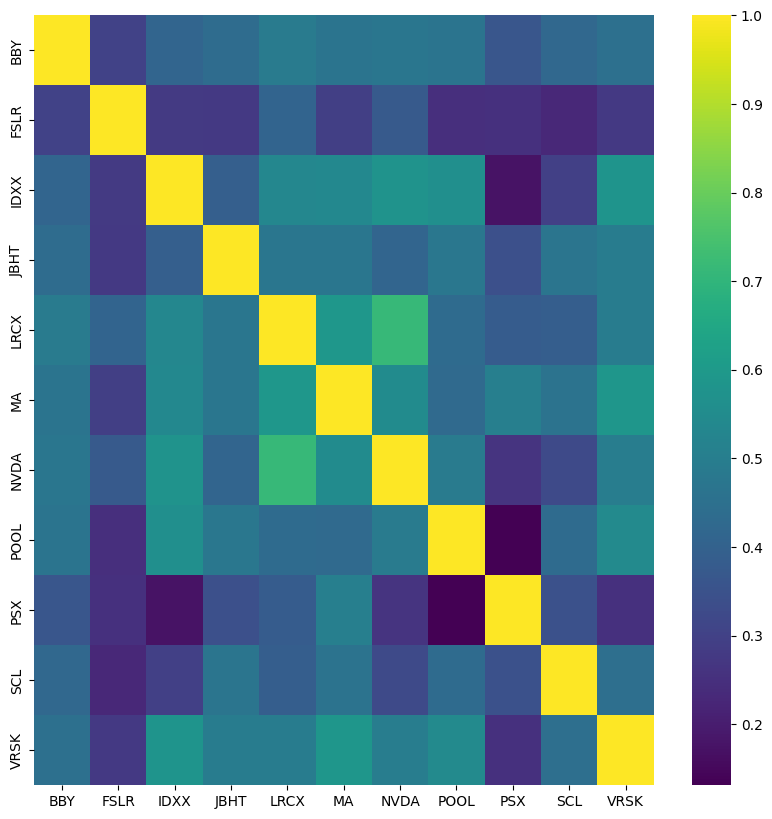

In [16]:

print('plotting the the correlation matrix of the stocks returns: ') 


plt.figure(figsize=(10,10))#feel free to reduce the figure size if it is too big

dataplot = sns.heatmap(stocks_rets_corr, cmap="viridis", annot=False) 

  
# displaying heatmap 
plt.show() 



## Standard deviation of stocks returns (Risk/Volatility)

In [21]:

print('The standard deviation of the returns of the  stocks are:') 

stocks_rets_std =  np.sqrt(stocks_rets.var()*252) 


stocks_rets_std



The standard deviation of the returns of the  stocks are:


BBY     0.404508
FSLR    0.500982
IDXX    0.348091
JBHT    0.319734
LRCX    0.491190
MA      0.329152
NVDA    0.529986
POOL    0.366995
PSX     0.438993
SCL     0.332041
VRSK    0.270476
dtype: float64

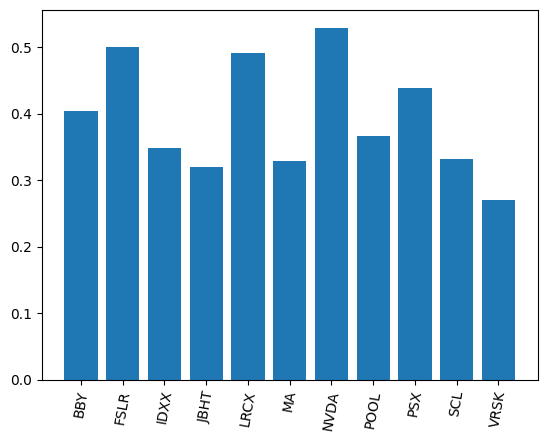

In [22]:

#  plotting  the standard deviation of the returns of stocks. 

plt.bar(stocks_rets_std.index,stocks_rets_std)
plt. xticks(rotation =80)
plt.show()



In [23]:

stocks_list = list(stocks_rets_cov.columns)


stocks_list


['BBY',
 'FSLR',
 'IDXX',
 'JBHT',
 'LRCX',
 'MA',
 'NVDA',
 'POOL',
 'PSX',
 'SCL',
 'VRSK']

## Portfolio simulation using monte carlo simulation

Investopedia defines monte carlo simulation as :

A method used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty.

https://www.investopedia.com/terms/m/montecarlosimulation.asp

another definition by the English dictionary app is:

(mathematics, statistics) Any of a class of techniques for estimating the solution of a numerical mathematical problem by means of a random artificial sampling experiment that simulates the problem.



<em><h3> Let us deal with some basic theory of the Modern Portfolio Theory otherwise known as mean-variance portfolio </h3></em>


### *Say we have*


## $$ w =\
\begin{bmatrix}
w_{1} \\
w_{2} \\
\vdots \\
w_{n} 
\end{bmatrix}
$$

### *where  $ w$  is the matrix of portfolio weights such that $\sum_{i=1}^{n} w_{i} = 1$*




### *Then the expected return of the portfolio is given by :*

## $$ E[R_{p}] = \mu_{p} = w^{T} R  = [w_{1} w_{2} ... w_{n}] \
\begin{bmatrix}
R_{1} \\
R_{2} \\
\vdots \\
R_{n} 
\end{bmatrix} $$





### *and the portfolio  variance is given by :*
 
 ## $$\sigma_{p}^2 = w^{T} V w  = [w_{1} w_{2} ... w_{n}] \begin{bmatrix}
\sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,n} \\
\sigma_{2,1} & \sigma_{2}^2 & \cdots & \sigma_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n,1} & \sigma_{n,2} & \cdots & \sigma_{n}^2 
\end{bmatrix} \begin{bmatrix}
w_{1} \\
w_{2} \\
\vdots \\
w_{n} 
\end{bmatrix}  $$

### the sharpe ratio which compares the returns of an investment with it's risk is also calculatd as:

## $$SR = \frac{\mu_{p} - R_{f}}{\sigma_{p}}$$

where $R_{f}$ is the risk-free rate 

$\mu_{p} - R_{f}$  is the excess return of the investment

the sharpe ratio can be used to define the best optinmal porfolio.



In [24]:

stks_len             = len(stocks_rets_cov)
stocks_rets_mean_num = stocks_rets_mean.to_numpy()
stocks_rets_cov_num  = stocks_rets_cov.to_numpy()
rfr =  0.043                                        # Risk free rate for US 10years treasury bills. 

def monte_carlo_sim():
    
    np.random.seed(42)                              # for repeatability
    num_ports   = 10000                             # Number  of portfolios to be simulated
    all_weights = np.zeros((num_ports, stks_len))   # Empty array to store each simulated portfolio weight.
    ret_arr     = np.zeros(num_ports)               # Empty array to each portfolio returns
    vol_arr     = np.zeros(num_ports)               # Empty array to each portfolio volatility
    sharpe_arr  = np.zeros(num_ports)               # Empty array to each portfolio sharpe ratio

    for x in range(num_ports):
        # Weights
        weights          = np.array(np.random.random(stks_len)) # Generating random numbers
        weights          = weights/np.sum(weights)              # making the random numbers equal to 1
        
        # Save weights
        all_weights[x,:] = weights
        
        # Expected return
        ret_arr[x]       = np.sum(stocks_rets_mean_num * weights)
        
        # Expected volatility
        vol_arr[x]       = np.sqrt(np.dot(weights.T, np.dot(stocks_rets_cov_num, weights)))
        
        # Sharpe Ratio
        sharpe_arr[x]    = (ret_arr[x] -  rfr) /vol_arr[x]
    return [all_weights,vol_arr,ret_arr,sharpe_arr]





### Running monte-carlo simulation 

In [25]:
%time monte_carlo_sim()

CPU times: user 406 ms, sys: 0 ns, total: 406 ms
Wall time: 412 ms


[array([[0.07172416, 0.1820611 , 0.14017631, ..., 0.11511309, 0.13559539,
         0.00394192],
        [0.20709344, 0.17774169, 0.04533827, ..., 0.06218273, 0.13064175,
         0.02978448],
        [0.07133054, 0.08945154, 0.11135483, ..., 0.14833919, 0.04163546,
         0.01588311],
        ...,
        [0.00904357, 0.10276071, 0.12625616, ..., 0.08172878, 0.08352767,
         0.07258257],
        [0.12166067, 0.14941911, 0.12749252, ..., 0.0333558 , 0.13702784,
         0.03401311],
        [0.11359237, 0.16794051, 0.10822945, ..., 0.10670285, 0.00224045,
         0.00954354]]),
 array([0.2589255 , 0.28241169, 0.27812471, ..., 0.27683896, 0.29058835,
        0.29991672]),
 array([0.18695258, 0.22160417, 0.22512134, ..., 0.24637231, 0.25454602,
        0.25357524]),
 array([0.55596138, 0.63242484, 0.65481898, ..., 0.73462313, 0.72799208,
        0.70211238])]

In [26]:

mc_sim_res = monte_carlo_sim()

# getting the return values

all_weights = mc_sim_res[0]
vol_arr     = mc_sim_res[1]
ret_arr     = mc_sim_res[2]
sharpe_arr  = mc_sim_res[3]


In [27]:

# getting the maximum portfolio values 

max_sr_idx = sharpe_arr.argmax()

max_sr = sharpe_arr.max()

max_sr_w = all_weights[max_sr_idx] 


max_sr_vol = vol_arr[max_sr_idx] 

max_sr_ret = ret_arr[max_sr_idx] 
    


In [29]:

# getting the minimum portfolio values, volatility, weights and return

min_port_idx = vol_arr.argmin()

min_vol      = vol_arr.min()

min_vol_w    = all_weights[min_port_idx] 

min_vol_ret  = ret_arr[min_port_idx] 
    

## Plotting results from monte-carlo portfolio simulation

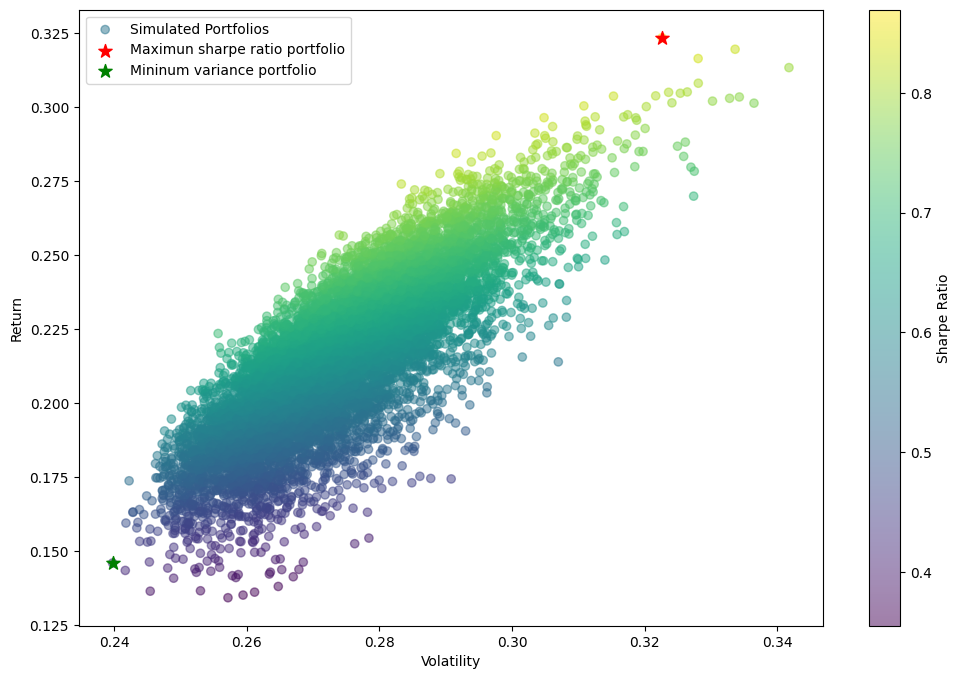

In [30]:



plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis',label = "Simulated Portfolios",alpha = 0.5)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red',marker="*", s=100, label = "Maximun sharpe ratio portfolio") # red star
plt.scatter(min_vol, min_vol_ret,c='green',marker="*", s=100, label = "Mininum variance portfolio") # green star
plt.legend()
plt.show()


### *Optimizing our portfolio:* defining our objective function and constraints.

## $$\underset{min}{\sigma_{p}^2}  \;\;w^{T}Vw$$  
### subject to 
## $$\sum_{i=1}^{n} w_{i} = 1$$

### and 
## $$E[R_{p}] = \mu_{p} = P$$

### Where P is the investor's desired expected rate of return.



### Getting a desired rate of return depends on the investor(how risk averted he is), some studies uses historical returns with the assumption that the future will always have a correlation to the past, but it is said to be risky, and some investor get returns rate from their financial advisor, but here we will be using the minimum and maximum returns from the monte carlo simulated portfolios.

### We will use 20 equally spaced values for a range of the two returns both inclusive.

### We are using multiple expected returns to get the efficient frontier. The portfolios on the efficient frontier are the optimal set set of portfolios, they gives the highest return for a volatility level, it is usually plotted on the return- volatility graph.


In [43]:

max_ret = ret_arr.max()

min_ret = ret_arr.min()

min_ret,max_ret

(0.134342872355045, 0.32350119528939664)

In [52]:

def get_ret_vol_sr(weights:np.ndarray) -> np.ndarray:
    weights = np.array(weights)
    ret     = np.sum(stocks_rets.mean() * weights) * 252
    vol     = np.sqrt(np.dot(weights.T, np.dot(stocks_rets.cov()*252, weights))) 
    sr      = (ret-rfr) /vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights:np.ndarray) -> np.ndarray:
    # the index 2 of the get_ret_vol_sr function  is the sharpe ratio 
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights:np.ndarray) -> np.ndarray:
    #returns 0 if sum of the weights is 1
    return np.sum(weights)-1

def minimize_volatility(weights:np.ndarray) -> np.ndarray :
    # the index 1 of the get_ret_vol_sr function  is the volatility
    return get_ret_vol_sr(weights)[1]


def sci_opt(bounds : tuple) -> np.ndarray:
    """
    This is the main function that optimizes
    
    bounds : A tuple containing tuples,each child tuple contains the boundary of the weight
    to be assigned to each stock.
    
    Returns : A array 
    """
    init_guess = np.array([1.0/len(stocks_list) for i in range(len(stocks_list))])  # making 
    # some initial guesses for the weights, this is needed in optimization problems
    # here we are making an initial guess that portfolio is equally weighted i.e 1/n assigned to each stock
    # where n is the number of stocks.
    
   
    from scipy.optimize import minimize

    frontier_y  = np.linspace(min_ret, max_ret , 20)  # Making an array of desired 
    #  returns as discussed above.
    

    # Volatility 
    frontier_x  = np.zeros_like(frontier_y) #An empty array to store the values of the optimized volatilities that forms the efficient frontier

    #each portfolio  weights 
    opt_weights = np.empty((len(frontier_y), len(stocks_list)) ,dtype = np.ndarray ) #An empty array
    #to store the values of the optimized portfolio weights that forms the efficient frontier
    
    # return,  Volatility,  sharpe ratio
    ret_vol_sr  = np.empty((len(frontier_y), 3) ,dtype = np.ndarray ) 
    
    # looping through each desired return.
    for ii in range(len(frontier_y)):
            desired_return = frontier_y[ii] 
            cons           = ({'type':'eq', 'fun':check_sum}, # This constraint makes
                              #sure the sum of weight is equal to 1 , the check_sum function is defined above

                              {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - desired_return}) # This line implements the 
                              # desired return constraint.

            result         = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons) # This line of
            # code is the optimization code, minimization of the volatility.
            
            frontier_x[ii] = result['fun']
            opt_weights[ii]= result.x
            ret_vol_sr[ii] = get_ret_vol_sr(result.x)
#    
    return np.array((frontier_y,frontier_x,opt_weights,ret_vol_sr,np.zeros((26,30))),dtype = "object")



In [ ]:
# frontier_y

In [47]:
def make_ef_df(bounds:tuple) -> pd.DataFrame:
    '''
    This function runs the optimization function and makes a dataframe of the
    optimized portfolios
    
    Returns : A dataframe of the optimized portfolios
    
    '''
    optm_rslt = sci_opt(bounds)
    
    frontier_y = optm_rslt[0]
    frontier_x = optm_rslt[1]
    opt_weights = optm_rslt[2]
    ret_vol_sr = optm_rslt[3]

    retvolsrdf = pd.DataFrame(ret_vol_sr, dtype = np.float64)
    retvolsrdf.columns = ['return', 'volatility', 'sharpe ratio'] 
    resultdf =  pd.DataFrame(opt_weights, dtype = np.float64 ) 
    resultdf.columns = stocks_list
    resultdfl = pd.concat([resultdf, retvolsrdf], axis =1)
    return resultdfl




# Maximum sharpe ratio  function

In [48]:
def max_sr_vals(resultdfl):
    # Getting  maximum  sharpe ratio  index
    ret_vol_lst =['volatility', 'return'] 
    srmaxidx = resultdfl['sharpe ratio'].idxmax()
    max_sr_vol  =  resultdfl['volatility'][srmaxidx] 
    max_sr_ret  =  resultdfl['return'][srmaxidx] 
    max_sr_vals_raw  =  resultdfl.loc[srmaxidx, :].copy() 

    #max_sr_vals_raw = resultdfl.loc[min_vol_idx, :].copy()
    max_sr_vals_pct  = round(max_sr_vals_raw.copy(),3)

    max_sr_vals_pct[stocks_list + ret_vol_lst] =     max_sr_vals_pct[ stocks_list + ret_vol_lst] *100  
    max_sr_vals_pct1 = max_sr_vals_pct[max_sr_vals_pct!=0] 
    max_sr_vals_pct2 = max_sr_vals_pct1.drop(labels =['return', 'volatility', 'sharpe ratio']) 
    print('The portfolio combination  at maximum  sharpe  ratio are (in %) :')
    print(max_sr_vals_pct2)
    # max_sr_vals_pct2.sum()
    #plotting  the weighting of the assets for maximum sharpe ratio portfolio   in a bar graph
    plt.bar( max_sr_vals_pct2.index, max_sr_vals_pct2)
    plt.title("Bar chart  showing portfolio weightings  of stocks at maximum sharpe ratio ")
    plt.ylabel("portfolio  weightings in %") 
    plt.xlabel("Stocks") 
    plt. xticks(rotation =80)
    plt. grid() 
    plt.show()

    print('For the maximum  sharpe ratio  we have :\n')
    print(f"Return :{max_sr_vals_pct1['return']}%") 
    print(f"Volatility :{max_sr_vals_pct1['volatility']}%") 
    print(f"Sharpe Ratio :{max_sr_vals_pct1['sharpe ratio']}")  

    return [max_sr_vol,max_sr_ret]





# Minimum variance function

In [49]:
def gmv(resultdfl):
    ret_vol_lst =['volatility', 'return'] 
    min_vol_idx = resultdfl.volatility.idxmin() 
    min_vol = resultdfl.volatility[min_vol_idx] 
    min_ret =  resultdfl['return'][min_vol_idx ]

    
    min_vol_vals_raw = resultdfl.loc[min_vol_idx, :].copy()
    min_vol_vals_pct  = round(min_vol_vals_raw.copy(),3)
    min_vol_vals_pct[stocks_list + ret_vol_lst] =     min_vol_vals_pct[stocks_list + ret_vol_lst] *100 
    min_vol_vals_pct1 = min_vol_vals_pct[min_vol_vals_pct!=0] 
    min_vol_vals_pct2 = min_vol_vals_pct1.drop(labels =['return', 'volatility', 'sharpe ratio']) 
    print('The portfolio combination  at  minimum volatility   are (in %) :')
    print(min_vol_vals_pct2)



    #plotting  the weighting of the assets for minimum volatility portfolio in a bar graph
    plt.bar( min_vol_vals_pct2.index, min_vol_vals_pct2 )
    plt.title("Bar chart  showing portfolio weightings  of stocks at minimum volatility ")
    plt.ylabel("portfolio  weightings in %") 
    plt.xlabel("Stocks") 
    plt. xticks(rotation =80)
    plt. grid() 
    plt.show()


    print('For the minimum volatility  we have :\n')
    print(f"Return :{min_vol_vals_pct1['return']}%") 
    print(f"Volatility :{min_vol_vals_pct1['volatility']}%") 
    print(f"Sharpe Ratio :{min_vol_vals_pct1['sharpe ratio']}")  
    return [min_vol,min_ret]


## Efficient frontier plotting function

In [50]:
    
def plot_optm_frontier(title_,resultdfl,max_sr_vol,max_sr_ret,min_vol,min_ret):
    #cml
    # y=mx+c
    m = (max_sr_ret-rfr) /(max_sr_vol) 
    x = np.linspace(0,max_sr_vol +0.1,100)
    y = (m*x) + rfr

    plt.figure(figsize=(12,8))
    plt.scatter(max_sr_vol, max_sr_ret,  label= 'maximum sharpe ratio' , marker="*",s = 150) 
    plt.scatter(min_vol, min_ret,label ='Global minimum variance portfolio ' ,marker="*",s = 150) 
    plt.scatter( stocks_rets_std, stocks_rets_mean, label = 'Assets',marker="*") 

    for i, label in enumerate(stocks_list):
        plt.annotate(label, ( stocks_rets_std[i],stocks_rets_mean[i]))
    plt.plot(x,y,label ="CML")
    plt.plot( resultdfl['volatility'] ,  resultdfl['return'] , 'r--', linewidth=2,label = "Efficient frontier")

    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.legend() 
    plt.title(title_)
    plt.show()


In [ ]:
#resultdfl_ss["sharpe ratio"].max()

# PORTFOLIO OPTIMIZATION WITH SHORTSELLING

In [51]:

bounds = tuple((-1,1) for i in range(len(stocks_list))) 

resultdfl_ss = make_ef_df(bounds)
gmv_ret_vol_ss = gmv(resultdfl_ss)
max_sr_vol_ret_ss = max_sr_vals(resultdfl_ss)

plot_optm_frontier('Efficient frontier with shortselling',resultdfl_ss,max_sr_vol_ret_ss[0],max_sr_vol_ret_ss[1],gmv_ret_vol_ss[0],gmv_ret_vol_ss[1])



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 20) + inhomogeneous part.

# PORTFOLIO OPTIMIZATION WITHOUT SHORTSELLING

The portfolio combination  at  minimum volatility   are (in %) :
FSLR     6.4
IDXX    11.2
JBHT    15.3
POOL     2.7
PSX      9.9
SCL     15.8
VRSK    38.7
Name: 2, dtype: float64


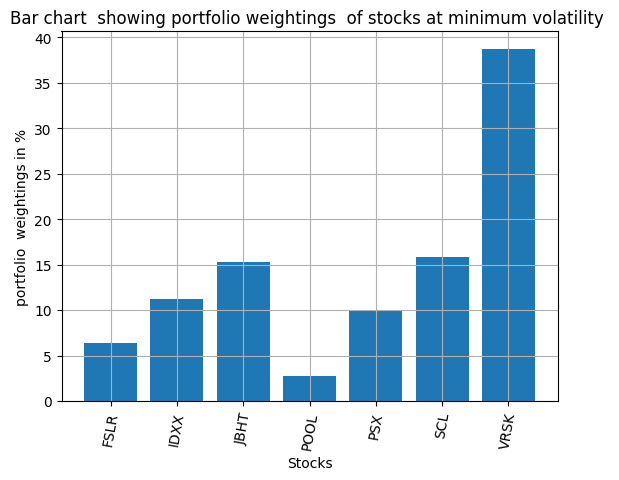

For the minimum volatility  we have :

Return :15.4%
Volatility :23.200000000000003%
Sharpe Ratio :0.479
The portfolio combination  at maximum  sharpe  ratio are (in %) :
FSLR    17.3
IDXX     4.1
JBHT     9.8
NVDA    31.6
POOL     3.8
VRSK    33.4
Name: 19, dtype: float64


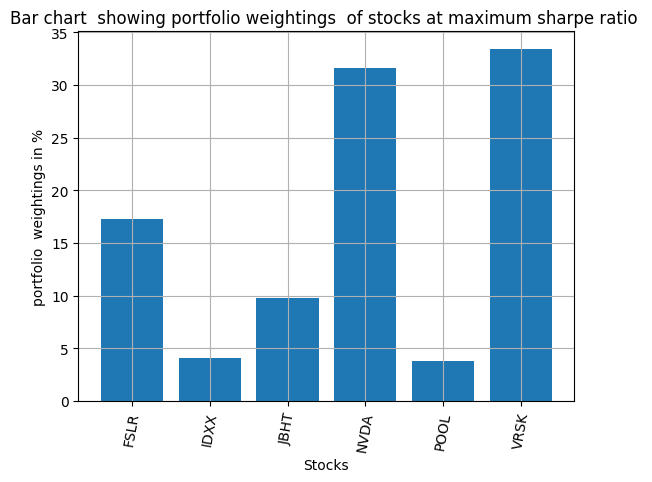

For the maximum  sharpe ratio  we have :

Return :32.4%
Volatility :30.7%
Sharpe Ratio :0.915


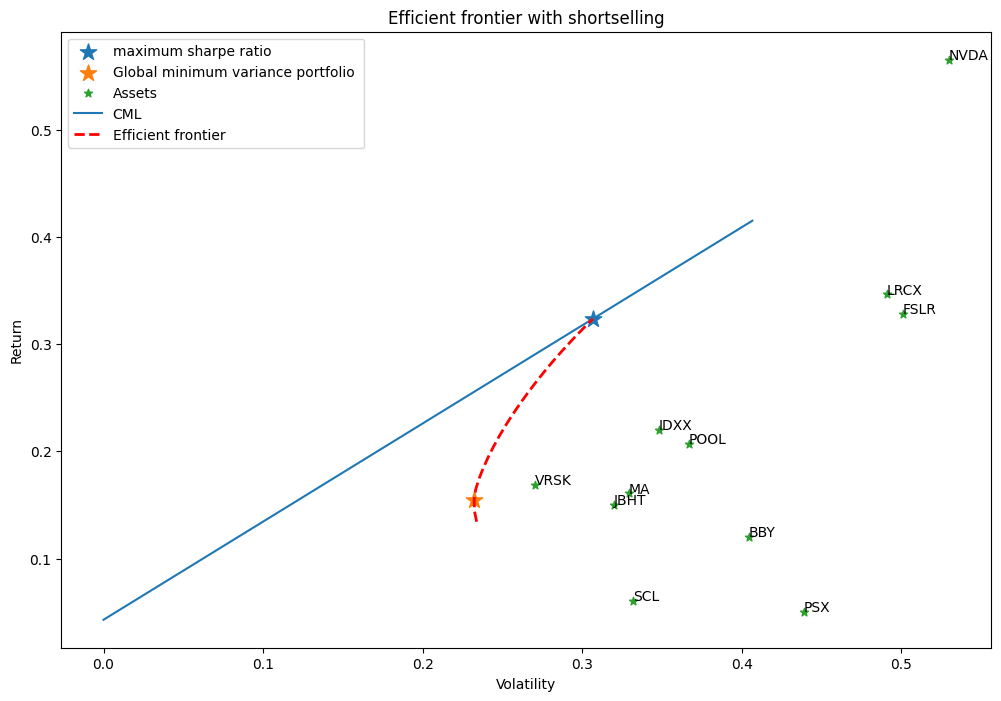

In [41]:

bounds = tuple((0,1) for i in range(len(stocks_list))) 

resultdfl = make_ef_df(bounds)
gmv_ret_vol = gmv(resultdfl)
max_sr_vol_ret = max_sr_vals(resultdfl)

plot_optm_frontier('Efficient frontier with shortselling',resultdfl,max_sr_vol_ret[0],max_sr_vol_ret[1],gmv_ret_vol[0],gmv_ret_vol[1])




## Comparing the two frontiers 



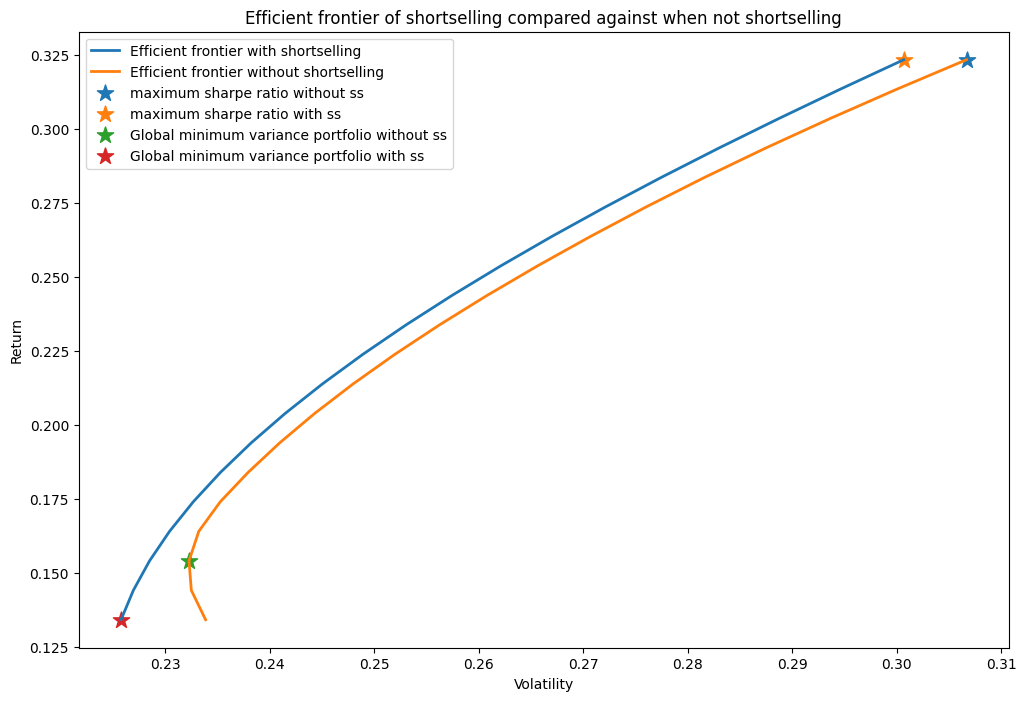

In [42]:
plt.figure(figsize=(12,8))

plt.plot( resultdfl_ss['volatility']  , resultdfl_ss['return'] , linewidth=2,label = "Efficient frontier with shortselling ")
plt.plot( resultdfl['volatility'] ,  resultdfl['return'] , linewidth=2,label = "Efficient frontier without shortselling ") #color = 'blue')

# resultdfl_ss,max_sr_vol_ret_ss[0],max_sr_vol_ret_ss[1],gmv_ret_vol_ss[0],gmv_ret_vol_ss[1]

# resultdfl,max_sr_vol_ret[0],max_sr_vol_ret[1],gmv_ret_vol[0],gmv_ret_vol[1]

plt.scatter(max_sr_vol_ret[0], max_sr_vol_ret[1],  label= 'maximum sharpe ratio without ss' , marker="*",s = 150) 
plt.scatter(max_sr_vol_ret_ss[0], max_sr_vol_ret_ss[1],  label= 'maximum sharpe ratio with ss' , marker="*",s = 150) 



plt.scatter(gmv_ret_vol[0], gmv_ret_vol[1],label ='Global minimum variance portfolio without ss' ,marker="*",s = 150) 
plt.scatter(gmv_ret_vol_ss[0], gmv_ret_vol_ss[1],label ='Global minimum variance portfolio with ss' ,marker="*",s = 150) 


plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend() 
plt.title("Efficient frontier of shortselling compared against when not shortselling")
plt.show()


In [58]:


m =resultdfl["sharpe ratio"].idxmax() 

m


18

In [59]:

resultdfl["sharpe ratio"].max()# [m] 



0.9600488367810548

In [61]:

resultdfl["return"][m] 




0.35830075135876

In [62]:

resultdfl["return"].max() 


0.35830075135876

In [63]:


resultdfl["volatility"].max() 



0.34196255313377466

In [64]:


resultdfl[resultdfl.columns[-3:] ] 




,return,volatility,sharpe ratio
0,0.079701,0.255458,0.194556
1,0.101822,0.248364,0.289180
2,0.123943,0.245307,0.382961
3,0.146064,0.244841,0.474037
4,0.168185,0.246085,0.561533
5,0.190306,0.249714,0.641959
6,0.212427,0.255630,0.713637
7,0.234548,0.263687,0.775723
8,0.256669,0.273692,0.828190
9,0.278790,0.285577,0.871182
